# HEALTHCARE INSURANCE COST ANALYSIS

## Objectives

* Using the right packages and tools to clean and transform a Healthcare Insurance Dataset to further draw insights from the data.Such packages include: Feature engine, scikit learn and pandas.
* Using the right packages to visualize the data for better analysis. Such packages include: Matplotlib, Seaborn and Plotly.
* Using the information from the analysis to provide data-driven hypothesis for better decision making.

## Inputs

* The dataset: 'insurance.csv'

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 





---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/home/alban/Project 1/Project1/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [ ]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

# For Google Colab compatibility
import sys
if 'google.colab' in sys.modules:
    print("Running in Google Colab")
else:
    print("Running locally")

You set a new current directory


Confirm the new current directory

In [11]:
current_dir = os.getcwd()
current_dir

'/home/alban'

# Section 1

Section 1 content

## Importing the packages or dependencies for the analysis


In [3]:
import pandas as pd
import numpy as np
import feature_engine 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Data Extraction
* We load the dataset 'insurance.csv' from the Raw Data subfolder using the pandas method '.read_csv()'. 

In [ ]:
df=pd.read_csv('/mnt/chromeos/MyFiles/Downloads/archive.zip')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Transformation
* This involves cleaning the data by checking for inadequacies such as missing values, duplicates and outliers. Before that we can check for the general overview of the dataset using the '.info()' method.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* The info method showed that the dataset contains 7 columns (4 numericals and 3 categorical), it also tells us the number of rows (1338) present in the dataset alongside the different data types (float, integer and object) of the variables. Next, we check for missing values in the dataset using the '.isnull().sum()' method.

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* The above method showed zero cases of missing values, therefore, we can go ahead and check for duplicates in the dataset using the '.duplicated()' method.

In [8]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


* The above shows that the two rows (195 and 581) contain duplicate values. we can use the '.drop_duplicates()' method to drop one of the duplicates leaving the first instance of the values.

In [9]:
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

np.int64(0)

* Next, we check for outliers. To do this, we will use the feature engine, scikit learn and seaborn modules to cap our data. For this exercise, we will be capping the outliers with calculations using the 'Winsorizer' step from feature engine and we will use a boxplot to visually see outliers before and after the capper is applied. The 'capping_method' parameter in the winsorizer will take the argument 'iqr', fold refers to the number that we will use to multiply the Inter Quartile range (IQR) and we will apply the capper on each end of the distribution, 'tail'='both'.We would also use the 'Pipeline' module from scikit learn to aggregate our transformers. 
* First, we check for what variables in the dataset contains outliers to cap. 

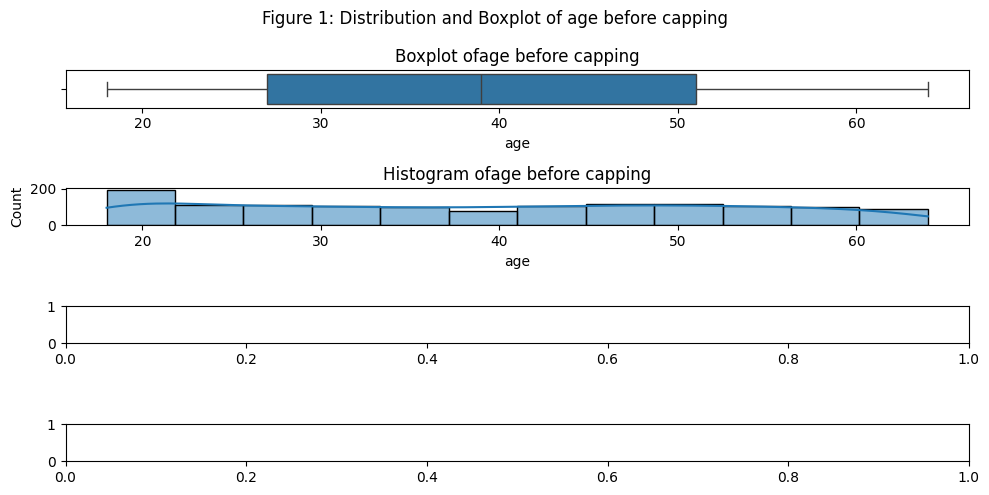

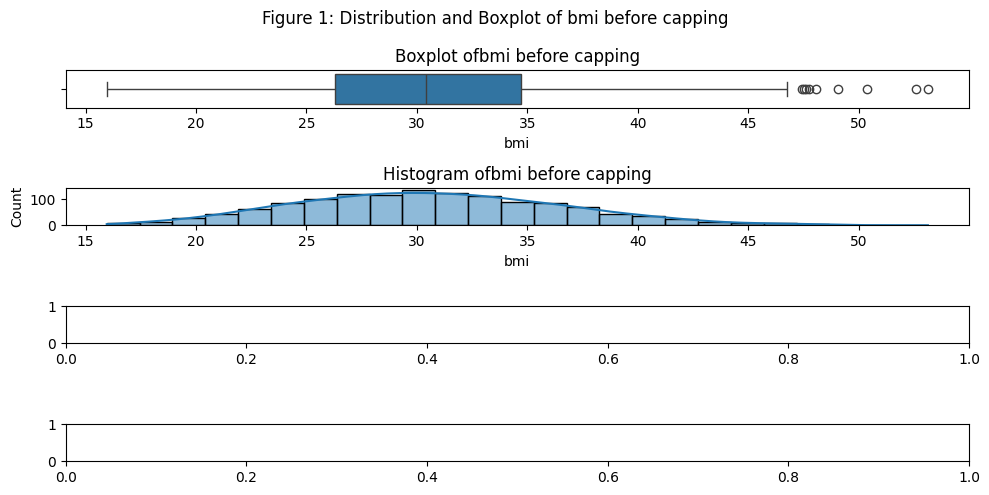

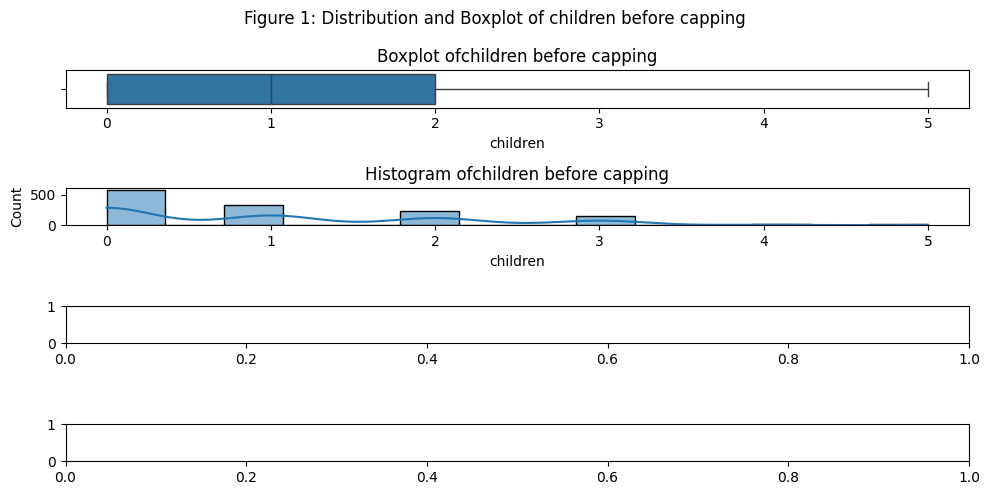

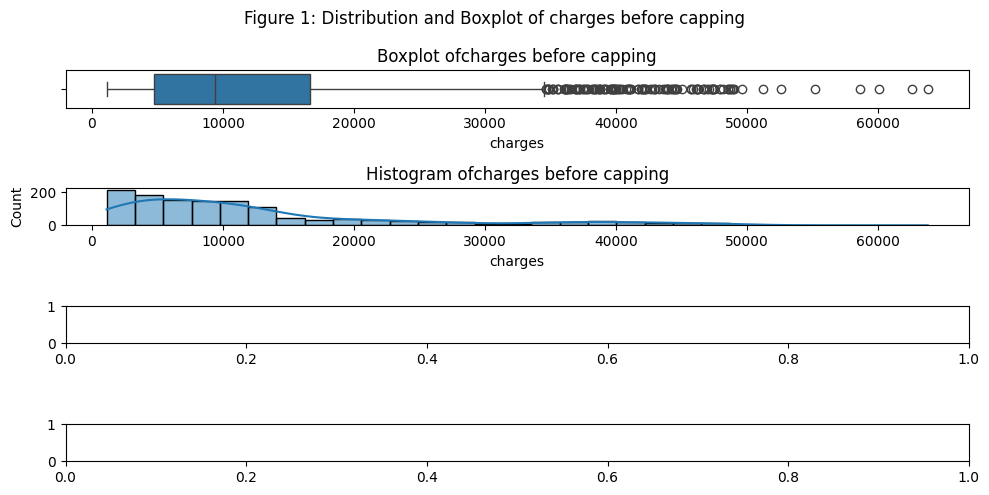

In [27]:
def pre_capped_data(df):
    for col in df.columns:
        if df[col].dtype != 'object':
            Q1=df[col].quantile(0.25)
            Q3=df[col].quantile(0.75)
            IQR=Q3-Q1 #Calculate interquartile range
            right_tail=Q3+1.5*IQR
            left_tail=Q1-1.5*IQR
            fig,axes=plt.subplots(nrows=4, ncols=1, figsize=(10,5))
            sns.boxplot(data=df, x=col, ax=axes[0])
            sns.histplot(data=df, x=col,kde=True, ax=axes[1])
            axes[0].set_title(f"Boxplot of{col} before capping")
            axes[1].set_title(f"Histogram of{col} before capping")
            fig.suptitle(f"Figure 1: Distribution and Boxplot of {col} before capping")
            plt.tight_layout()
            plt.show()
pre_capped_data(df)

            




* In the Figure 1 above, the variables('bmi' and 'charges')are the variables with the most significant amount of outliers.Hence, we apply a capper method from the feature engine module 'feature_engine.outliers'. For this analysis, we will apply the 'Winsorizer' method.

In [28]:
from feature_engine.outliers import Winsorizer as W
from sklearn.pipeline import Pipeline #importing the packages to create a pipeline to cap outliers

P=Pipeline([(
    'Capper'
,W(capping_method='iqr', tail='both', fold=1.5, variables=['bmi', 'charges']))])


* Next, we fit the pipeline into the dataset and transform the data using the '.fit_transform()' method below:

In [29]:
df_transformed=P.fit_transform(df)
df_transformed.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* To checkif the capper were applied on the dataset, we use the '.right_tail_caps_'and '.left_tail_caps_'to check for the limit if the match the range as stated in the 'pre_capped_data(df)' above.

In [30]:
P['Capper'].left_tail_caps_

{'bmi': 13.674999999999994, 'charges': -13120.716174999998}

In [31]:
P['Capper'].right_tail_caps_

{'bmi': 47.31500000000001, 'charges': 34524.777625}

* The limit values match, we can then get to the next part of the ETL pipeline which is to save the new transformed data for future purposes.

In [32]:
df_transformed.to_csv('data file/Clean_Data/Cleaned_Insurance_Data.csv', index=False)

OSError: Cannot save file into a non-existent directory: 'data file/Clean_Data'

---

# Section 2

Section 2 content

# Data Visualization using Matplotlib and Seaborn
* In this exercise, we will make use of packages such as 'matplotlib.pyplot' and 'seaborn' to visualize the data using several plots such as: Histograms (to see the Data spread across the mean), bar chart (to compare categorical values in a variable) and a Scatter Plot(to observe the relationship between variables).
* Firstly, we will use a '.describe()' method to show us the general descriptive analytics of the entire dataframe.

In [ ]:
df_transformed.describe(include='all') #Descriptive statistics of the transformend dataframe

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.650247,1.095737,NaN,NaN,12491.159952
std,14.044333,NaN,6.059655,1.205571,NaN,NaN,10165.511950
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


* The dataframe above shows the general descriptive or summary stats of every single variable in the dataframe. Those stats are present in the index such where parameters such as; mean, standard deviation (std),maximum and minimum values,25th and 75th quantile, and the median (50%). It also displays the summary stats for categoricalvariables ('sex','smoker', 'region') such as; unique values in the variable (number of objects in the variable), the top value (values with the most count, mode,frequency or occurence) and the frequency of occurence for the top values.
* We observe that in the categorical variable, sex, the male sex had the most occurence with 675 out of 1337 entries, a non-smoker for the 'smoker' variable with a mode of 1063 entries and the southeast value for region variable with a mode of 364 entries.

Next, we plot multiple histogram and kdeplot on the numerical variables of the dataset to see how spread the values are across the mean, we will use matplotlib.pyplot and seaborn.
We had already plot those figures in figure 1 above but for clarity,we will plot it again:

/home/chizoalban2003/Project1/Project1/.venv/lib/python3.11/site-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


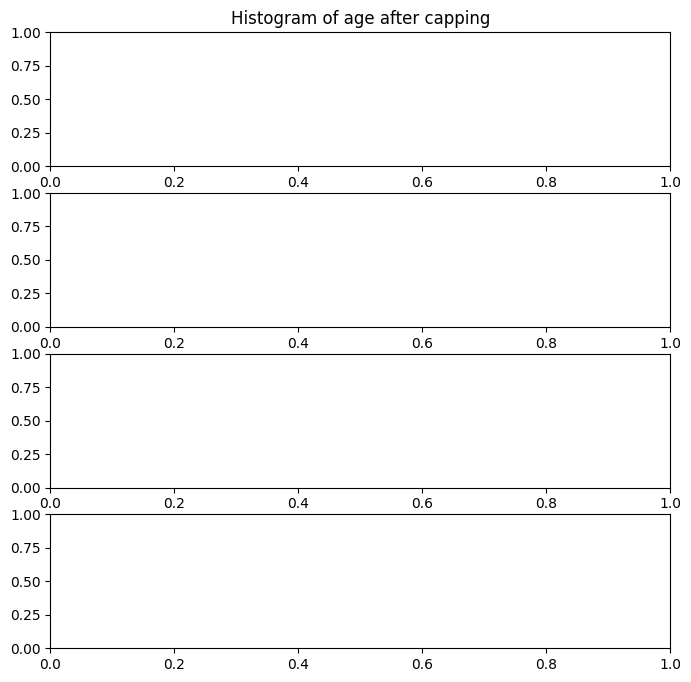

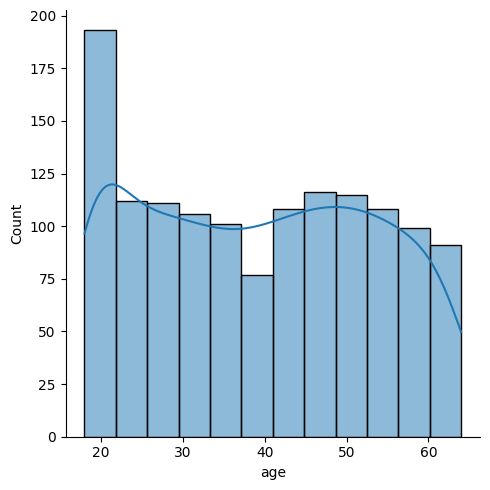

/home/chizoalban2003/Project1/Project1/.venv/lib/python3.11/site-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


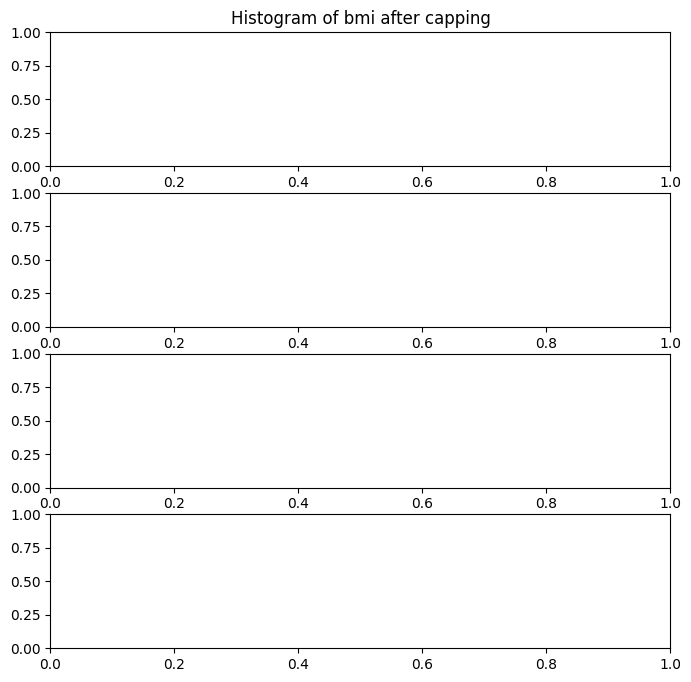

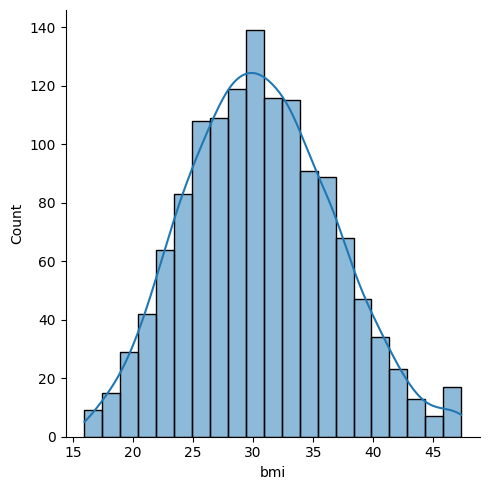

/home/chizoalban2003/Project1/Project1/.venv/lib/python3.11/site-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


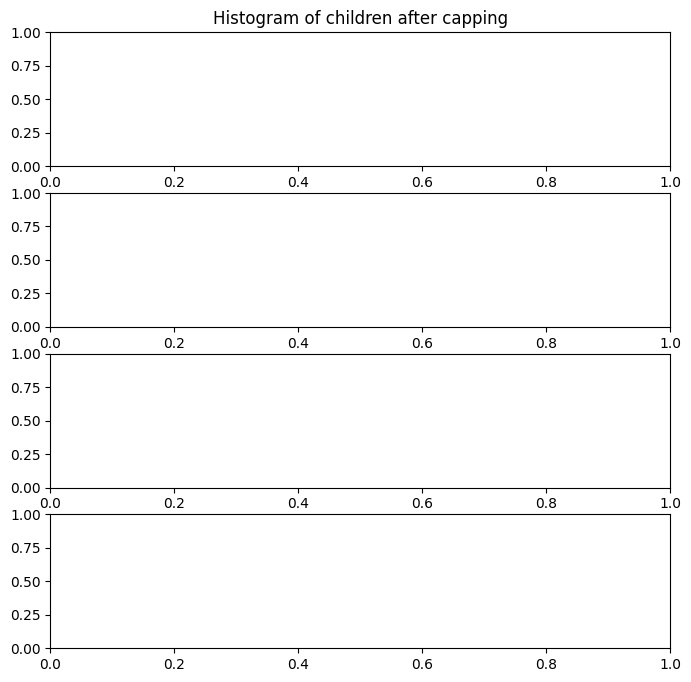

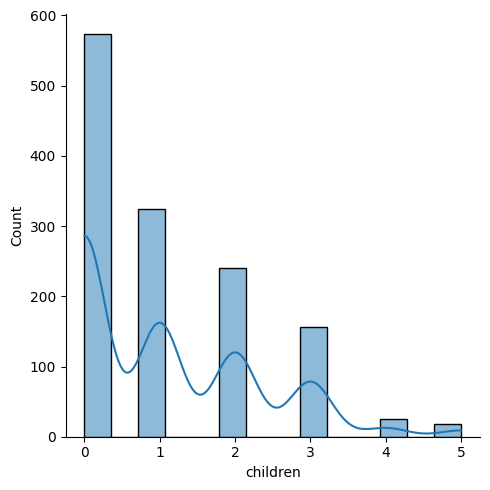

/home/chizoalban2003/Project1/Project1/.venv/lib/python3.11/site-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


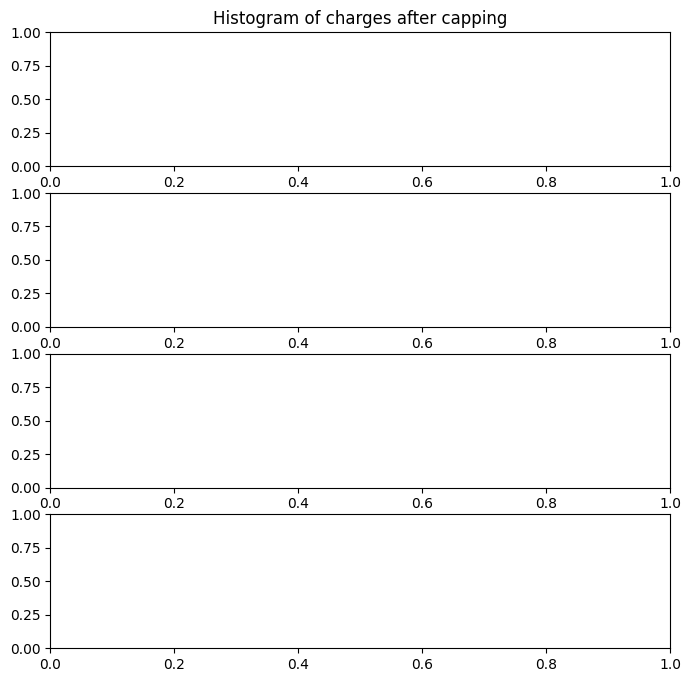

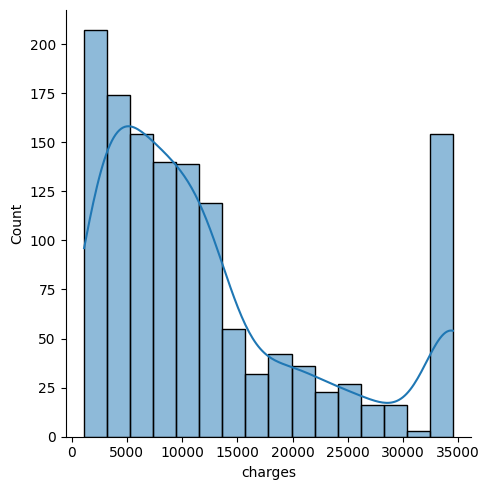

In [ ]:
 for col in df_transformed.columns:
    if df_transformed[col].dtype != 'object':
        fig, axes=plt.subplots (nrows=4, ncols=1,figsize=(8,8))
        sns.displot(data=df_transformed, x=col, kde=True, ax=axes[0])
        axes[0].set_title(f"Histogram of {col} after capping")
        plt.tight_layout()
        plt.show()
    fig.suptitle (f" Figure 3: Distribution of all numerical variables")

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [22]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)